In [123]:
# Importing 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

# To see data on world map we use :
import plotly.express as px

# For Deployment
import joblib

In [81]:
# Let's load the data file
data= pd.read_csv(r"/Users/irishrana/Desktop/UL/CASE STUDY/USL Case study/Country-data.csv")

In [82]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [83]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [84]:
data.shape

(167, 10)

In [85]:
# Correlation Heatmap


# Visualize the data 

In [86]:

# Before we begun visualization lets convert country to index (As it's a redundant column)
data.set_index('country',inplace=True) 
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Univariate Analysis

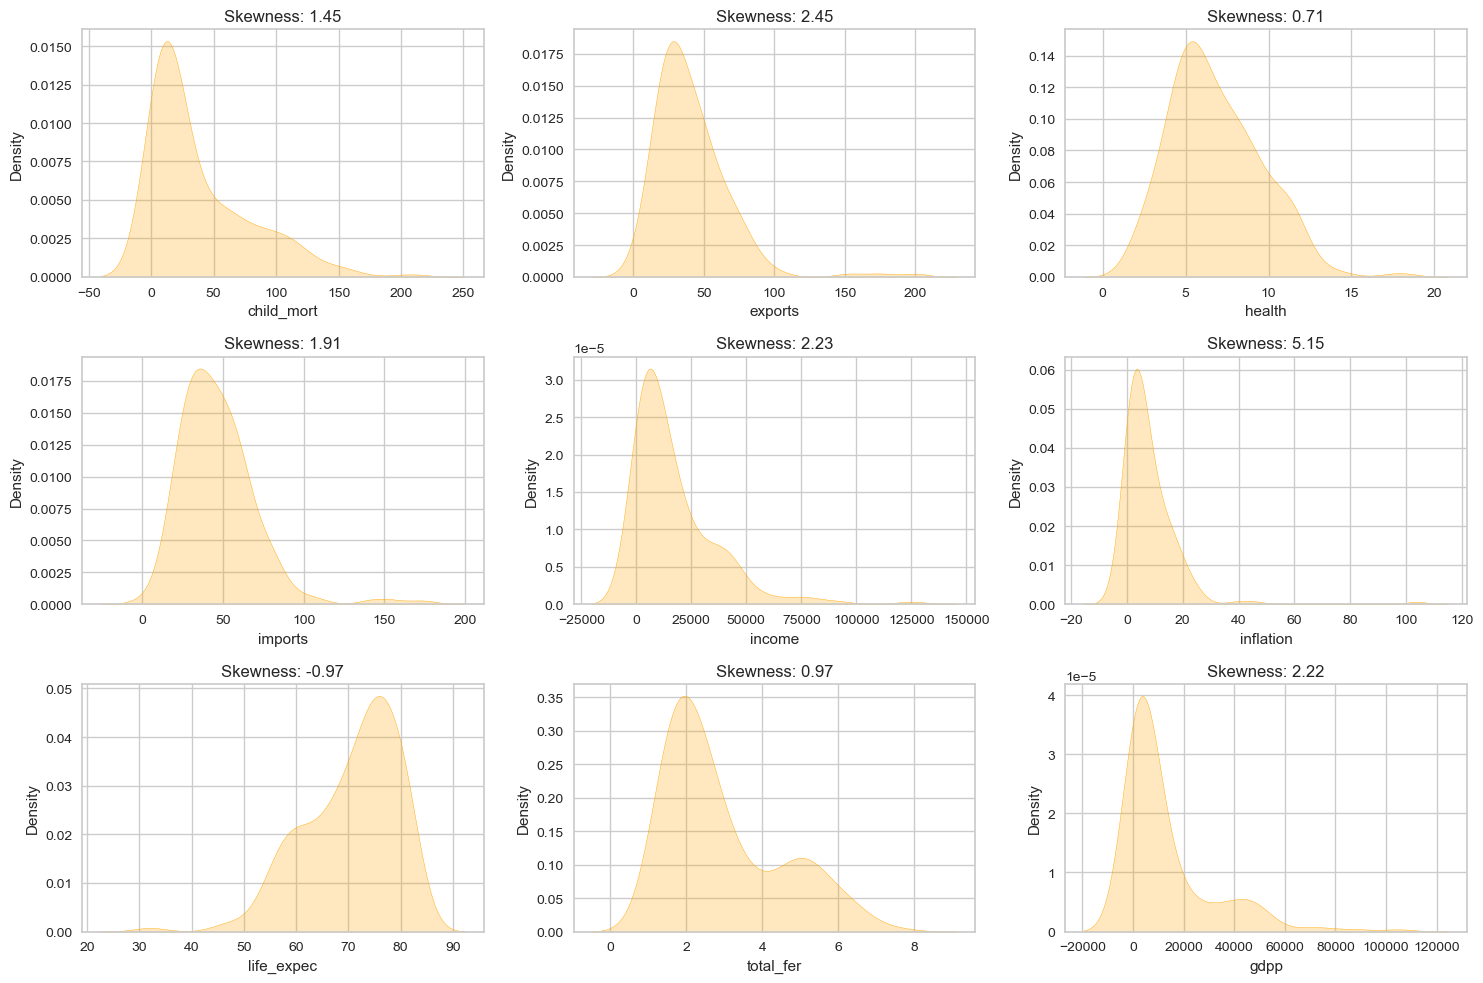

In [87]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.kdeplot(data=data,x=i,fill=True,color='orange')
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()    

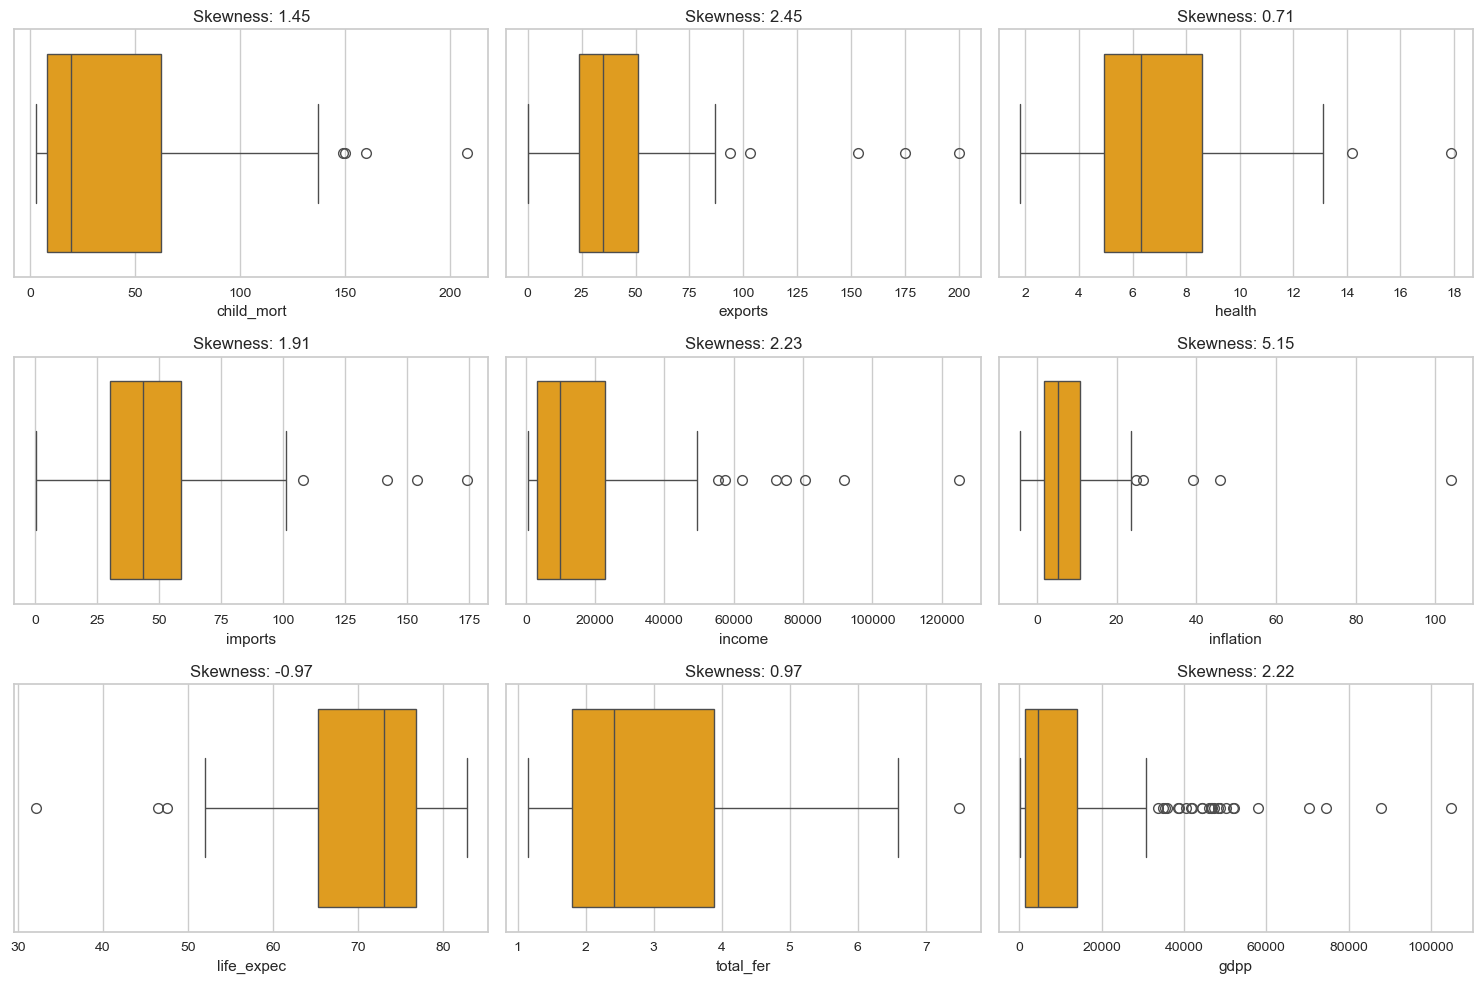

In [88]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,color='orange')
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()   

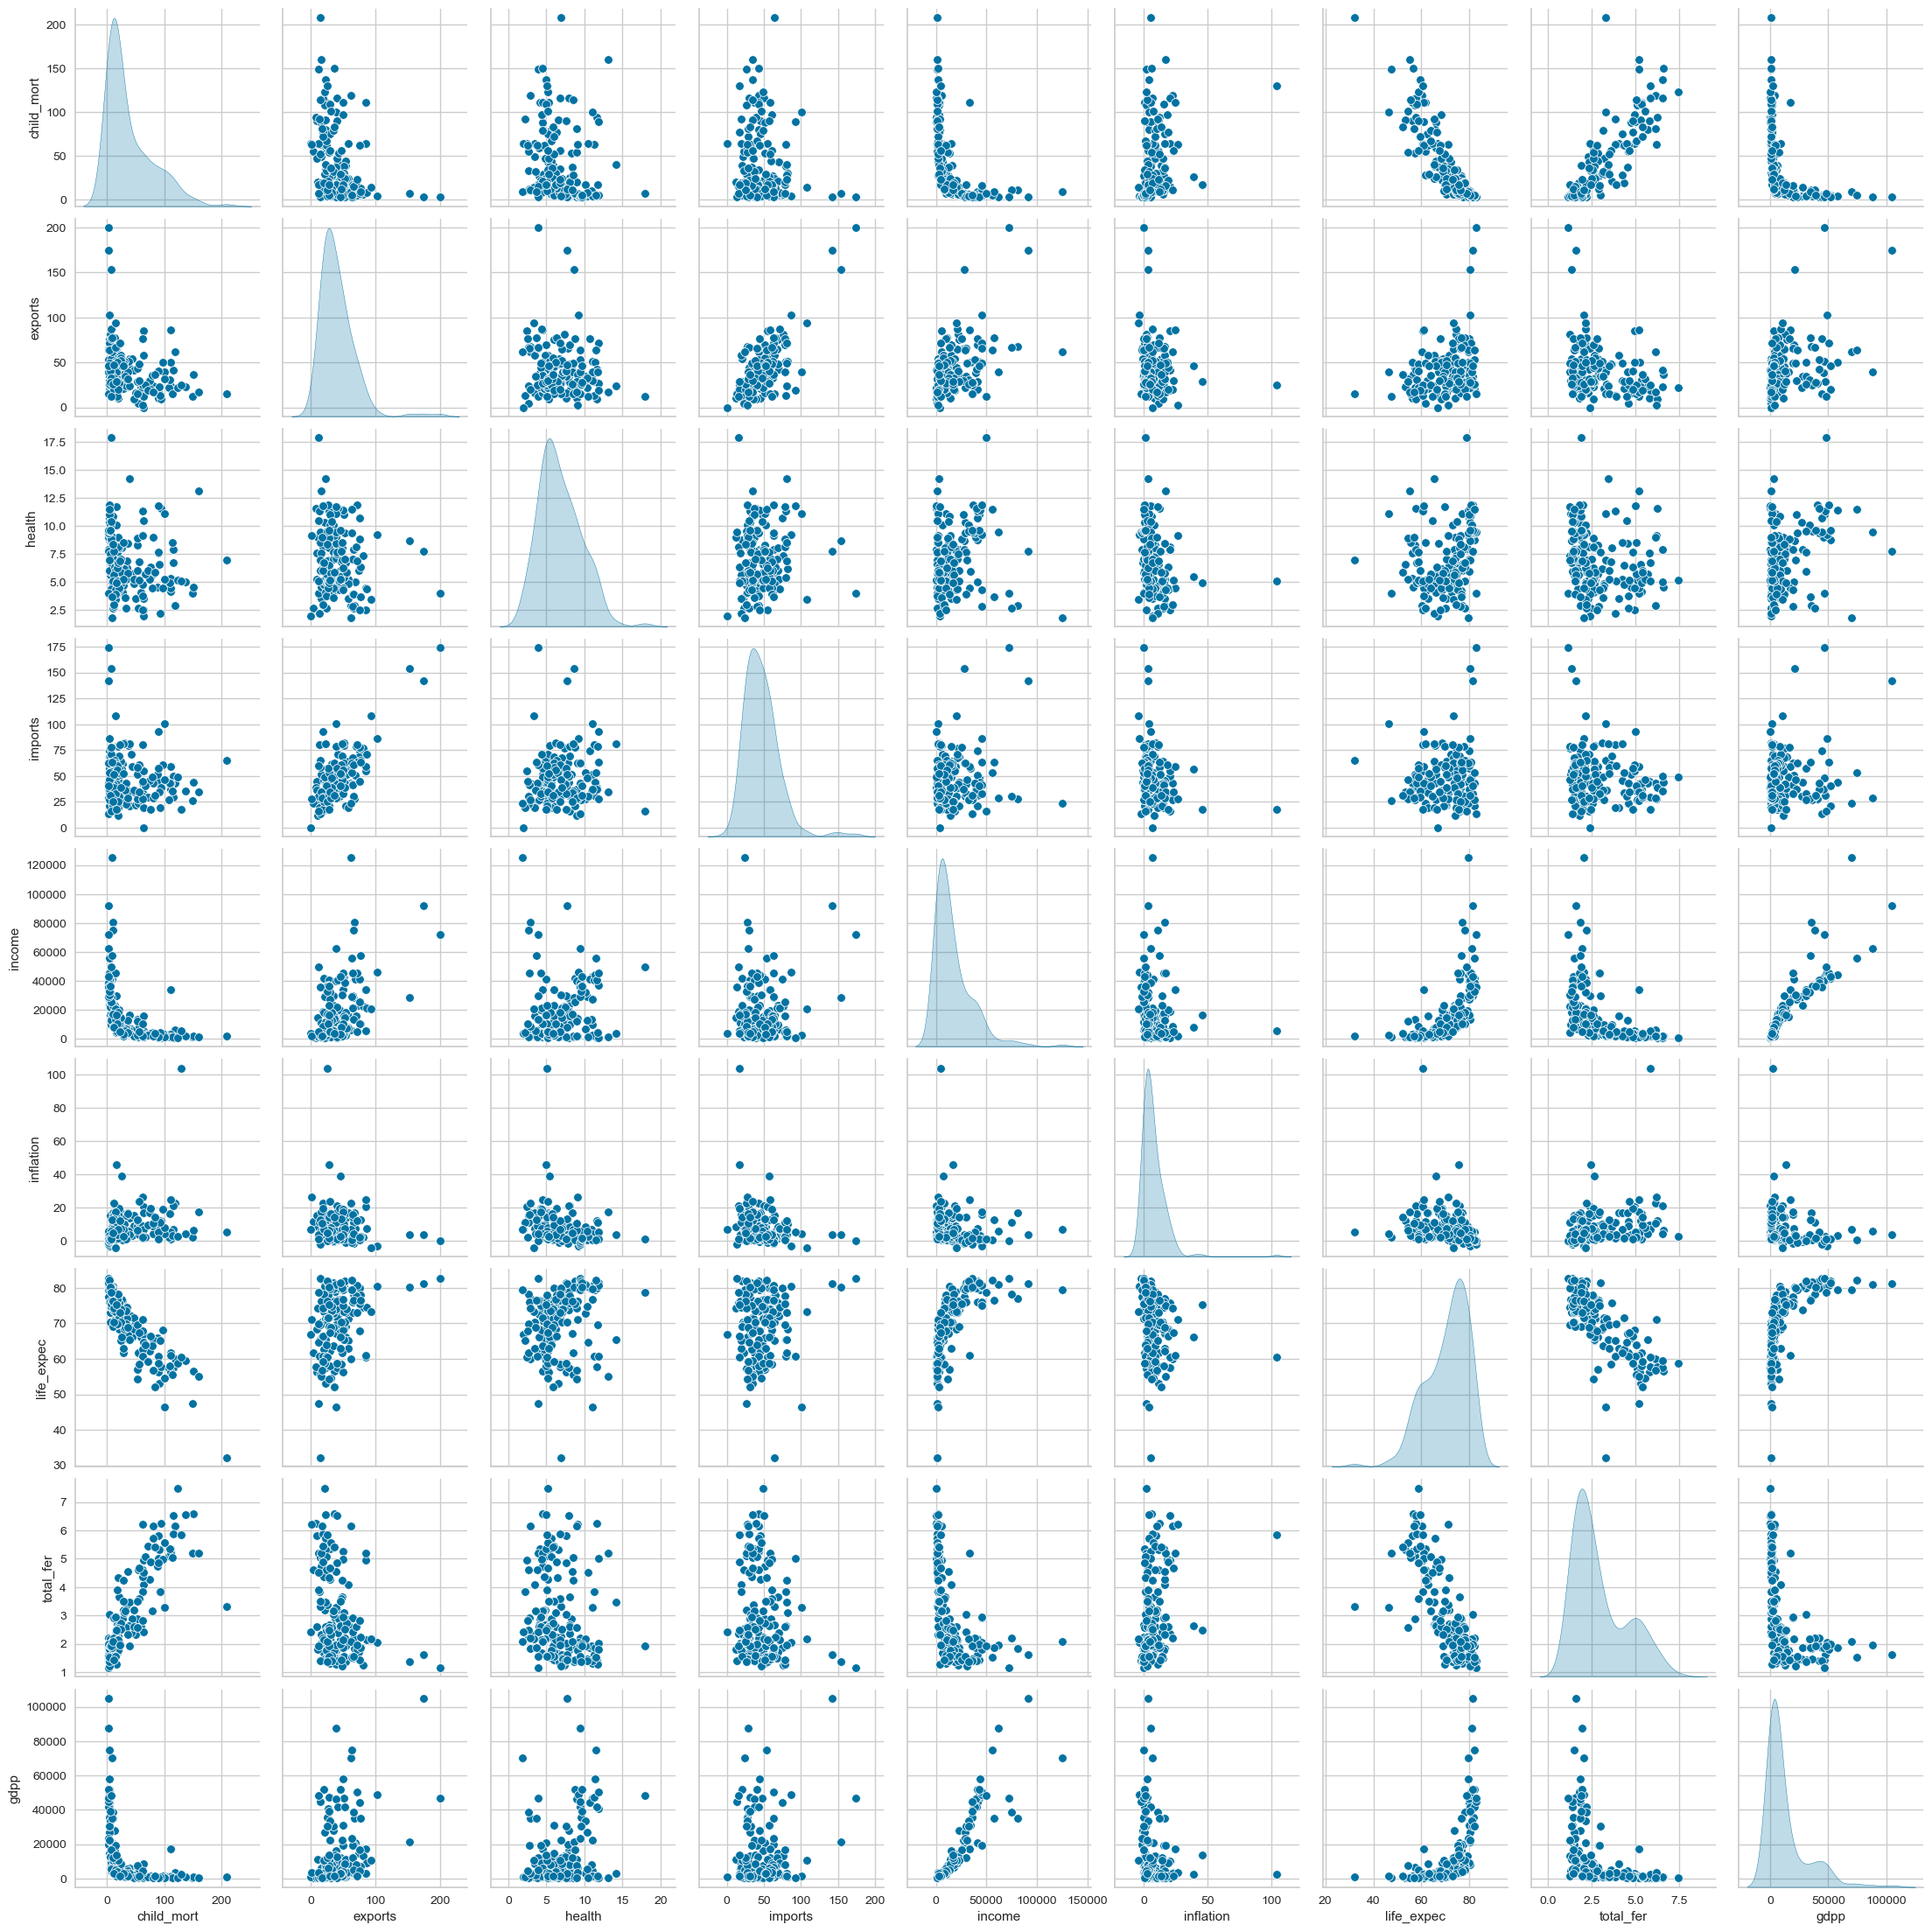

In [89]:
sns.pairplot(data,diag_kind='kde')
plt.show()

In [90]:
# Check the missing values
data.isnull().sum().sum()
# No missing values

np.int64(0)

In [91]:
# Lets

for i in data.columns:
    q1,q3=np.quantile(data[i],[0.25,0.75])
    iqr=q3-q1
    ul,ll=q3+2.5*iqr,q1-2.5*iqr
    data[i]=data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

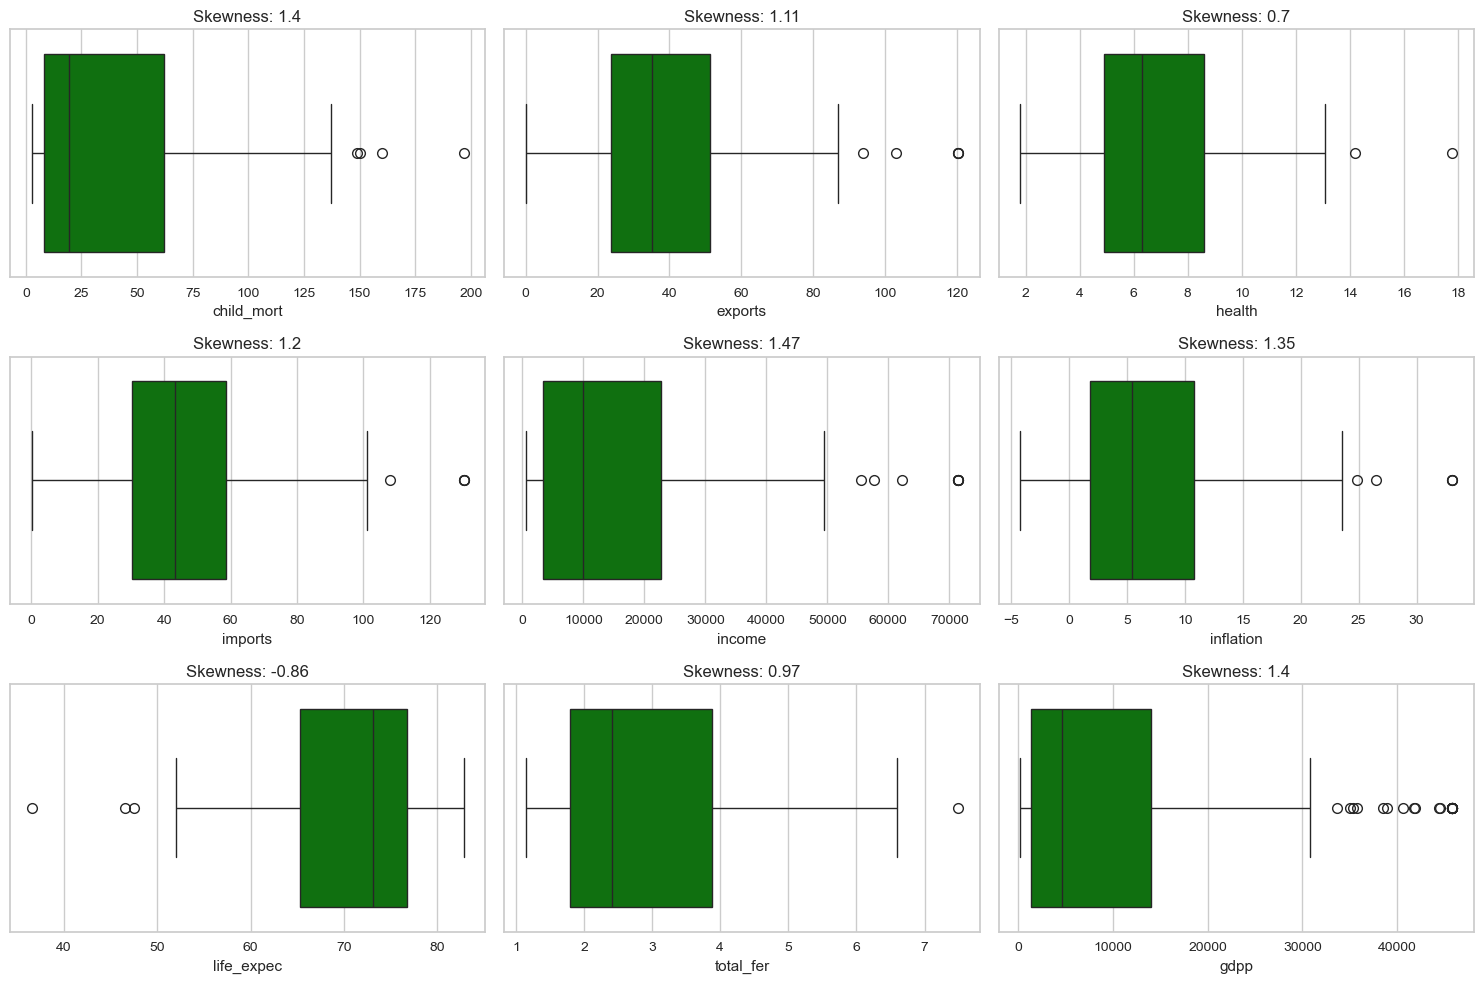

In [92]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,color='green')
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()  

In [93]:
# Let's apply PCA on the data before we proceed with clustering 


# le's create and instance of scalling
scaler=StandardScaler()

# Also let's create an instance for PCA 
pca=PCA(n_components=5,random_state=2)

# Let's create pipeline for 
pipeline=Pipeline([('Scale',scaler),('PCA',pca)])

In [94]:
pipeline.fit(data)

Pipeline(steps=[('Scale', StandardScaler()),
                ('PCA', PCA(n_components=5, random_state=2))])

In [95]:
pca

PCA(n_components=5, random_state=2)

In [96]:
pca.explained_variance_ratio_.cumsum()
# At n_components = 5 we are able to explain ~ 95% variance which is good enough 

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697])

In [97]:
final_data=pipeline.transform(data)

In [98]:
# transform return the array. Let's convert it into dataframe 
final_data=pd.DataFrame(final_data,columns=['PC1','PC2','PC3','PC4','PC5'],
                        index=data.index)
final_data.head(5)

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311


# K-Means Clustering

In [99]:
# Identify the value of K 

# Kelbow Visualizer 
kelbow=KElbowVisualizer(estimator=KMeans(random_state=2),k=10)

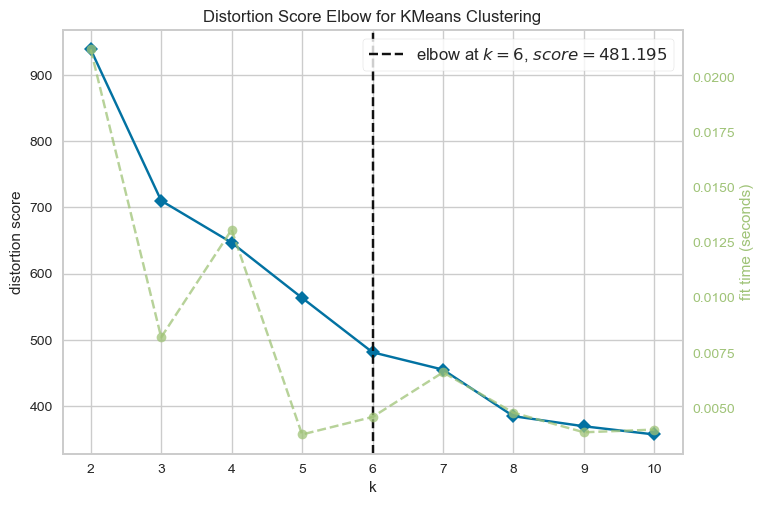

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
kelbow.fit(final_data)
kelbow.show()

Although the above plot marks the elbow at k=6. But we can see the significance drop in distortion score from k=2 to k=3 . As we increase the number of clusters it might become over fitted . So let's explore sillhouette visualizer to identify the correct number of clusters or more generalize value of K.

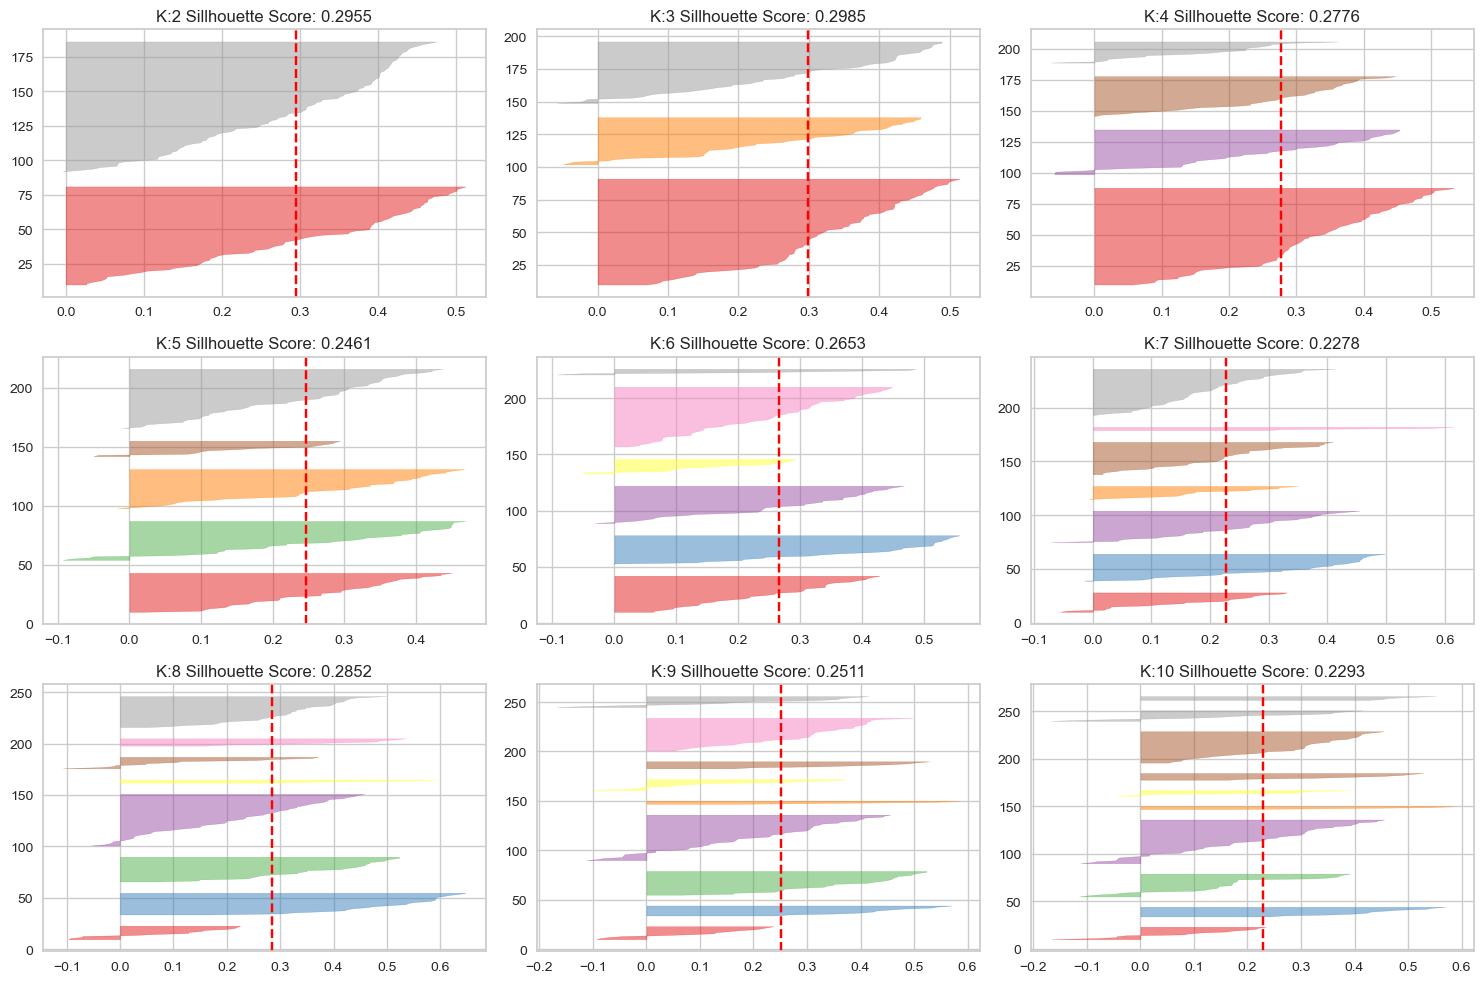

In [101]:
t=1 
plt.figure(figsize=(15,10))
for i in range(2,11):
    plt.subplot(3,3,t)
    model=KMeans(n_clusters=i,random_state=2)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(final_data)
    plt.title(f'K:{i} Sillhouette Score: {round(sil_viz.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

After analyzing Elbow plot and SilhouetteVisualizer let's  go with k=3. Although there are few datapoints that have been misclassified, but we see no drop in sillhouette score and there is good enough data in every cluster. Also from k-elbow plot significant drop in WCSS(diistortion Score) was observed from k=2 to k=3.

In [102]:
final_kmeans=KMeans(n_clusters=3,random_state=2)

In [103]:
labels= final_kmeans.fit_predict(final_data)

In [104]:
# Let's check the sillhouette score 
print('silhouette_score:',silhouette_score(final_data,labels))

silhouette_score: 0.29845782348296623


In [105]:
labels

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [106]:
# Let's put these 
final_data['Labels']=labels
final_data.head(3)

,PC1,PC2,PC3,PC4,PC5,Labels
country,,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800,2
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623,0
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119,0


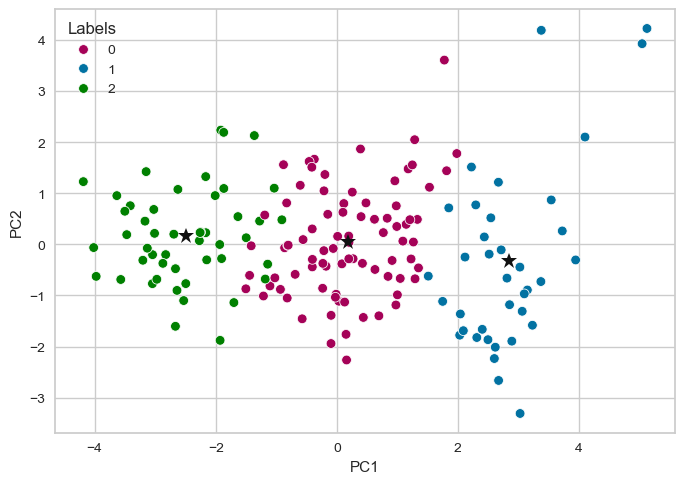

In [107]:
# Let's visualize the clusters
# in order to get the best visualization let's choose PC1 PC2

centroids= final_kmeans.cluster_centers_
centroids

sns.scatterplot(data=final_data,x='PC1',y='PC2',palette=['m','b','green'],hue='Labels')
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*',ms=12,color='k')
plt.show()    

In [108]:
# Business Intrepretation

In [109]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
Venezuela,17.1,28.5,4.91,17.6,16500.0,33.10,75.4,2.47,13500.0
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0


In [110]:
data['Label']=labels
data.head(2)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0


In [111]:
data.groupby(by='Label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Label,,,,,,,,,
0,21.508537,40.797317,6.231951,48.097561,12281.097561,7.474744,72.875610,2.311707,6291.146341
1,5.237838,53.575000,8.780270,49.129054,42690.878378,2.588432,79.956757,1.755676,36905.405405
2,92.131771,28.546229,6.296458,41.443040,3937.770833,10.438854,59.438542,4.953958,1902.916667


After studying the above data we can conclude that countries that have been assigned in cluster 2 can be called underdeveloped , while cluster 1 are developred. Countries belongong to cluster 0 are doing average in most of the factors but struggling in some economic factors like GDPP/income and expenditure on health. hemce, they can be called developing

In [112]:
data['Label']=data['Label'].map({0:'Developing',
                                 1:'Developed',
                                 2: 'Underdeveloped'})

In [113]:
# Developed countries
data[data['Label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [114]:
# Developing countries
data[data['Label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

In [115]:
# Under Developed countries
data[data['Label']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

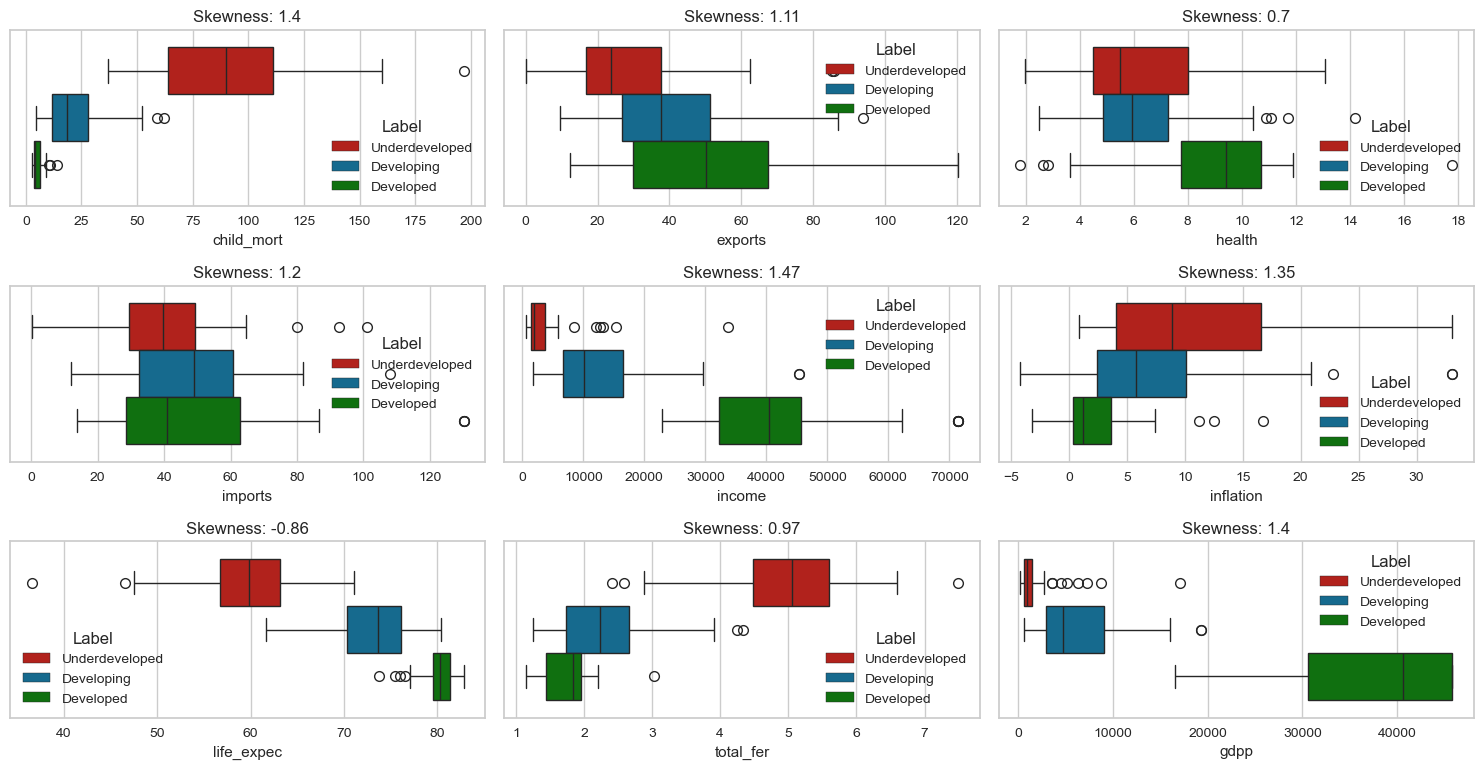

In [116]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    if i!='Label':
        plt.subplot(4,3,t)
        sns.boxplot(data=data,x=i,hue='Label',palette=['r','b','green'])
        plt.title(f'Skewness: {round(data[i].skew(),2)}')
        t+=1
plt.tight_layout()
plt.show()  

In [117]:
# Let's plot on  World map
px.choropleth(data_frame=data,locationmode='country names',
              locations=data.index,color='Label',
              color_discrete_map={'Underdeveloped':'red',
                                  'Developing':'blue',
                                  'Developed':'green'})

# Deployment

In [118]:
final_pipeline=Pipeline([('Scale',scaler),
                         ('PCA',pca),
                         ('Model',final_kmeans)])

In [119]:
input_data=data.iloc[0,:-1].values

In [120]:
input_data

array([np.float64(90.2), np.float64(10.0), np.float64(7.58),
       np.float64(44.9), np.float64(1610.0), np.float64(9.44),
       np.float64(56.2), np.float64(5.82), np.float64(553.0)],
      dtype=object)

In [121]:
final_input_data=pipeline.transform([input_data])
final_input_data

array([[-3.04363665, -0.20115529,  0.95132235,  0.79344472, -0.00680001]])

In [122]:
final_kmeans.predict(final_input_data)[0]

np.int32(2)

In [124]:
# Let's create a joblib file of pipeline
with open('pipeline.joblib','wb')as file:
    joblib.dump(pipeline,file)

In [125]:
# Let's create a joblib file of model
with open('pipeline.joblib','wb')as file:
    joblib.dump(final_kmeans,file)